<a href="https://colab.research.google.com/github/Nithin-Chaganty/imdb-top-100-webscraper/blob/main/Webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shows everything but only top 25 of content ratings.

In [1]:
import requests
from bs4 import BeautifulSoup
import json

In [2]:
url = "https://www.imdb.com/chart/top/?ref_=nv_mv_250"
headers = {'User-Agent': 'Mozilla/5.0'}

In [3]:
# Step 1: Download the page
response = requests.get(url, headers=headers)

In [4]:
# Step 2: Parse the page
soup = BeautifulSoup(response.text, "html.parser")

In [5]:
# Step 3: Find the <script> tag with type="application/ld+json"
script_tag = soup.find("script", type="application/ld+json")

In [6]:
# Step 4: Load the JSON
if script_tag:
    data = json.loads(script_tag.string)

    # Step 5: Access the list of movies (should have all 250, we slice top 100)
    movies = data.get("itemListElement", [])[:100]

    # Step 6: Print movie details
    for idx, movie_info in enumerate(movies, start=1):
        movie = movie_info["item"]

        title = movie.get("name", "Unknown Title")
        url = movie.get("url", "N/A")
        imdb_rating = movie.get("aggregateRating", {}).get("ratingValue", "N/A")
        rating_count = movie.get("aggregateRating", {}).get("ratingCount", "N/A")
        content_rating = movie.get("contentRating", "Not Rated")

        # Format duration
        raw_duration = movie.get("duration", "Unknown")
        duration = "Unknown"
        if raw_duration.startswith("PT"):
            raw = raw_duration[2:].lower()
            hours = ""
            minutes = ""
            if "h" in raw:
                hours = raw.split("h")[0] + "h"
                raw = raw.split("h")[1]
            if "m" in raw:
                minutes = raw.split("m")[0] + "min"
            duration = f"{hours} {minutes}".strip()

        print(f"{idx}. {title}")
        print(f"   URL: {url}")
        print(f"   IMDb Rating: {imdb_rating} stars ({rating_count} votes)")
        print(f"   Length: {duration}")
        print(f"   Content Rating: {content_rating}")
        print("-" * 60)
else:
    print("Could not find the JSON script tag.")

1. The Shawshank Redemption
   URL: https://www.imdb.com/title/tt0111161/
   IMDb Rating: 9.3 stars (3127895 votes)
   Length: 2h 22min
   Content Rating: R
------------------------------------------------------------
2. The Godfather
   URL: https://www.imdb.com/title/tt0068646/
   IMDb Rating: 9.2 stars (2182316 votes)
   Length: 2h 55min
   Content Rating: R
------------------------------------------------------------
3. The Dark Knight
   URL: https://www.imdb.com/title/tt0468569/
   IMDb Rating: 9.1 stars (3103490 votes)
   Length: 2h 32min
   Content Rating: PG-13
------------------------------------------------------------
4. The Godfather Part II
   URL: https://www.imdb.com/title/tt0071562/
   IMDb Rating: 9 stars (1467194 votes)
   Length: 3h 22min
   Content Rating: R
------------------------------------------------------------
5. 12 Angry Men
   URL: https://www.imdb.com/title/tt0050083/
   IMDb Rating: 9 stars (960857 votes)
   Length: 1h 36min
   Content Rating: Approved


In [7]:
import pandas as pd

# Step 4: Load the JSON and store movie data
if script_tag:
    data = json.loads(script_tag.string)
    movies = data.get("itemListElement", [])[:100]

    movie_data = []

    for idx, movie_info in enumerate(movies, start=1):
        movie = movie_info["item"]

        title = movie.get("name", "Unknown Title")
        url = movie.get("url", "N/A")
        imdb_rating = movie.get("aggregateRating", {}).get("ratingValue", "N/A")
        rating_count = movie.get("aggregateRating", {}).get("ratingCount", "N/A")
        content_rating = movie.get("contentRating", "Not Rated")

        # Format duration column
        raw_duration = movie.get("duration", "Unknown")
        duration = "Unknown"
        if raw_duration.startswith("PT"):
            raw = raw_duration[2:].lower()
            hours = ""
            minutes = ""
            if "h" in raw:
                hours = raw.split("h")[0] + "h"
                raw = raw.split("h")[1]
            if "m" in raw:
                minutes = raw.split("m")[0] + "min"
            duration = f"{hours} {minutes}".strip()

        movie_data.append({
            "Title": title,
            "URL": url,
            "IMDb Rating": imdb_rating,
            "Rating Count": rating_count,
            "Content Rating": content_rating,
            "Duration": duration
        })

    # Save to DataFrame
    df_movies = pd.DataFrame(movie_data)

    # Export CSV
    df_movies.to_csv("imdb_top_100.csv", index=False)

    # Export metadata
    metadata = """
Dataset Title: IMDb Top 100 Movies

Description:
This dataset was created by scraping the IMDb Top 250 list and collecting details for the top 100 ranked movies. The data includes titles, ratings, content warnings, and other metadata available on IMDb.

Variables:
- Title: Name of the movie.
- URL: Direct link to the movie’s IMDb page.
- IMDb Rating: Average viewer rating out of 10.
- Rating Count: Number of votes the movie has received.
- Content Rating: Age-based content classification (e.g., PG-13).
- Duration: Length of the movie formatted in hours and minutes.

Source: https://www.imdb.com/chart/top/

Date Created: 05-16-2025
"""
with open("imdb_top_100_metadata.txt", "w") as f:
    f.write(metadata)


/tmp/ipython-input-3997169095.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Content Rating", y="Rank", data=filtered_df, palette="Set2")


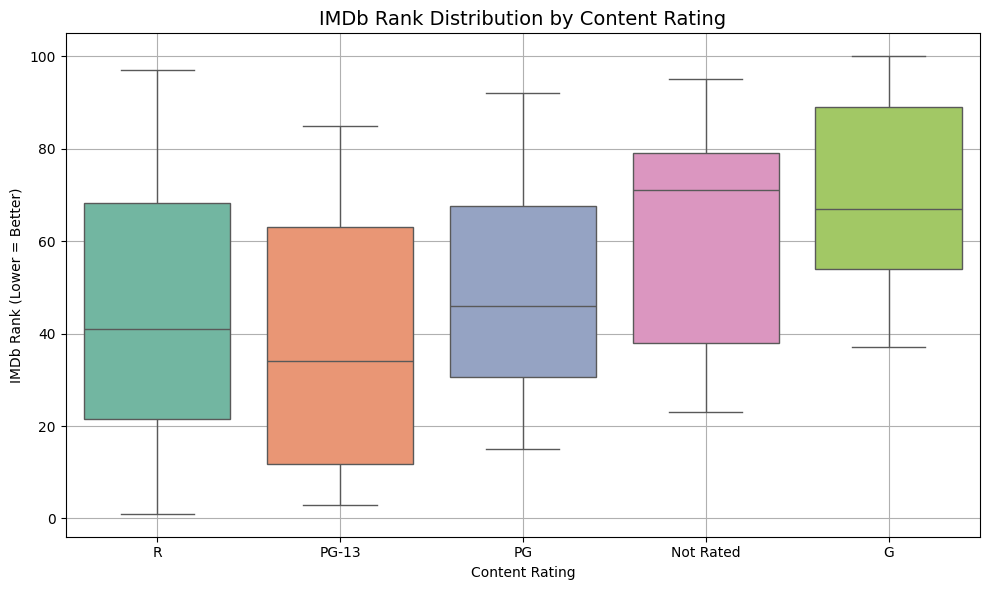

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Rank column is added
df_movies["Rank"] = range(1, len(df_movies) + 1)

# Filter only common content ratings (optional: remove Not Rated or rare categories)
filtered_df = df_movies[df_movies["Content Rating"].isin(["G", "PG", "PG-13", "R", "Not Rated"])]

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Content Rating", y="Rank", data=filtered_df, palette="Set2")

plt.title("IMDb Rank Distribution by Content Rating", fontsize=14)
plt.xlabel("Content Rating")
plt.ylabel("IMDb Rank (Lower = Better)")
plt.grid(True)
plt.tight_layout()
plt.show()
